In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
pense = pd.read_csv('PENSE_AMOSTRA2_ALUNO.CSV', sep=';', thousands='.', decimal=',')
pense.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


In [3]:
pense.shape

(16556, 181)

In [4]:
pense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [5]:
pense.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


In [6]:
pense.rename(columns={'VB17003': 'weight', 'VB17004': 'height', 'VB11007': 'satisfaction', 'VB01001': 'gender', 
                      'VB01002': 'color', 'VB01003': 'age', 'VB01022': 'study_period', 'VB04002': 'age_first_smoke',
                     'VB04006A': 'parent_smoke','ANOPESQ': 'year_research', 'PAIS': 'country','REGEOGR':'region', 
                      'VB00004':'agree','VB01004':'month_born', 'VB01005':'year_born', 'VB01021':'school_period', 
                     'VB01023': 'Fulltime_student', 'VB01024':'intern_regim', 'VB01025': 'education_goal', 'VB01026':
                      'next_step_studies'}, inplace=True)

### Identify the gender distribution 

In [8]:
pense['gender'].value_counts()

1    8287
2    8269
Name: gender, dtype: int64

In [9]:
pense['gender'].value_counts(normalize=True)*100

1    50.054361
2    49.945639
Name: gender, dtype: float64

### Student satisfaction level in relation to their body 

In [10]:
frequence = pense['satisfaction'].value_counts()
frequence

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: satisfaction, dtype: int64

In [11]:
percent = pense['satisfaction'].value_counts(normalize=True)*100
percent

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: satisfaction, dtype: float64

In [12]:
answers = {
    1: 'Very Satisfied',
    2: 'Satisfied',
    3: 'Indiferent',
    4: 'Insatisfied',
    5: 'Very insatisfied',
    99: 'None'
}
freq_distr = pd.DataFrame({'Frequence': frequence, 'Percent': percent})
freq_distr.rename(index = answers, inplace=True)
freq_distr.rename_axis('Satisfaction Level', axis=1, inplace=True)
freq_distr

Satisfaction Level,Frequence,Percent
Satisfied,6920,41.797536
Very Satisfied,4608,27.832810
Insatisfied,2326,14.049287
Indiferent,1807,10.914472
Very insatisfied,714,4.312636
None,181,1.093259


### Creating a new feature called BMI and ad to the dataframe, to cross information with the Satisfaction Level of students in relation to their body

In [13]:
pense['BMI'] = pense['weight'] / ((pense ['height']/100)**2)
pense['BMI']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: BMI, Length: 16556, dtype: float64

## Identify the levels of BMI- Body Mass Index using pandas function cut() and classify in levels 

### Facts about overweight and obesity

In 2016, more than 1.9 billion adults aged 18 years and older were overweight. Of these over 650 million adults were obese.
In 2016, 39% of adults aged 18 years and over (39% of men and 40% of women) were overweight.
Overall, about 13% of the world’s adult population (11% of men and 15% of women) were obese in 2016.
The worldwide prevalence of obesity nearly tripled between 1975 and 2016.
In 2019, an estimated 38.2 million children under the age of 5 years were overweight or obese. Once considered a high-income country problem, overweight and obesity are now on the rise in low- and middle-income countries, particularly in urban settings. In Africa, the number of overweight children under 5 has increased by nearly 24% percent since 2000. Almost half of the children under 5 who were overweight or obese in 2019 lived in Asia.

Over 340 million children and adolescents aged 5-19 were overweight or obese in 2016.

The prevalence of overweight and obesity among children and adolescents aged 5-19 has risen dramatically from just 4% in 1975 to just over 18% in 2016. The rise has occurred similarly among both boys and girls: in 2016 18% of girls and 19% of boys were overweight.

**While just under 1% of children and adolescents aged 5-19 were obese in 1975, more 124 million children and adolescents (6% of girls and 8% of boys) were obese in 2016.**

Overweight and obesity are linked to more deaths worldwide than underweight. Globally there are more people who are obese than underweight – this occurs in every region except parts of sub-Saharan Africa and Asia.

Font: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight

In [14]:
classes = [0, 18.5, 25, 30, 60]
labels = ['Under_weight', 'Normal', 'Over_weight', 'Obesity']

pense['BMI_Level'] = pd.cut(x= pense['BMI'],
      bins= classes,
      labels=labels,
      include_lowest =True)

pense[['BMI','BMI_Level']]

,BMI,BMI_Level
0,15.051321,Under_weight
1,21.727839,Normal
2,18.502907,Normal
3,23.322831,Normal
4,28.122076,Over_weight
...,...,...
16551,20.113223,Normal
16552,17.930782,Under_weight
16553,23.968489,Normal
16554,18.995343,Normal


In [15]:
pense.head()

,year_research,country,region,agree,gender,color,age,month_born,year_born,VB01006,...,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,BMI,BMI_Level
0,2015,76,1,1,2,1,13,7,7,1,...,299.735235,1,2,4,1,1,1,296,15.051321,Under_weight
1,2015,76,1,1,2,1,14,4,7,1,...,355.170081,1,2,4,1,2,1,296,21.727839,Normal
2,2015,76,1,1,1,4,13,6,7,1,...,299.735235,1,2,4,1,3,1,296,18.502907,Normal
3,2015,76,1,1,1,1,14,6,7,1,...,355.170081,1,2,4,1,4,1,296,23.322831,Normal
4,2015,76,1,1,1,1,13,9,7,1,...,299.735235,1,2,4,1,5,1,296,28.122076,Over_weight


## Plot a table with the frequence and percent of students in relation to BMI

In [16]:
frequence = pense['BMI_Level'].value_counts()
percent = pense['BMI_Level'].value_counts(normalize=True) *100
freq_distr = pd.DataFrame({'Frequence': frequence, 'Percent': percent})
freq_distr.rename(index = answers, inplace=True)
freq_distr.rename_axis('BMI Level', axis=1, inplace=True)
freq_distr

BMI Level,Frequence,Percent
Normal,9188,55.496497
Under_weight,4975,30.049529
Over_weight,1760,10.630587
Obesity,633,3.823387


In [17]:
pense['height'].mean()

160.71311307079006

In [18]:
g = {
    1: 'Male',
    2: 'Female'
}

frequence_sex = pd.crosstab(pense['satisfaction'], pense['gender'])
frequence_sex.rename(index = answers, inplace=True)
frequence_sex.rename(columns = g, inplace=True)
frequence_sex

gender,Male,Female
satisfaction,,
Very Satisfied,2682,1926
Satisfied,3490,3430
Indiferent,950,857
Insatisfied,786,1540
Very insatisfied,260,454
None,119,62


The level of satisfaction among students of a sample'Pense 2015'by gender satisfaction consider the general criteria

In [19]:
frequence_sex = pd.crosstab(pense['satisfaction'], pense['gender'], normalize= True)*100
frequence_sex.rename(index = answers, inplace=True)
frequence_sex.rename(columns = g, inplace=True)
frequence_sex

gender,Male,Female
satisfaction,,
Very Satisfied,16.199565,11.633245
Satisfied,21.079971,20.717565
Indiferent,5.738101,5.176371
Insatisfied,4.747524,9.301764
Very insatisfied,1.570428,2.742208
None,0.718773,0.374487


By analize the total male students and their percent of satisfaction, its conclude from the sample analysed that from the total os students not satisfect with their body, 66% are Female and only 33.8% are Male.

In [20]:
frequence_sex = pd.crosstab(pense['satisfaction'], pense['gender'], normalize= 'index')*100
frequence_sex.rename(index = answers, inplace=True)
frequence_sex.rename(columns = g, inplace=True)
frequence_sex

gender,Male,Female
satisfaction,,
Very Satisfied,58.203125,41.796875
Satisfied,50.433526,49.566474
Indiferent,52.573326,47.426674
Insatisfied,33.791917,66.208083
Very insatisfied,36.414566,63.585434
None,65.745856,34.254144


Here the analise of satisfaction is take from each gender, for example, Female 18.6% of them are Insatisfect with their body while Male only 9.5% are insatisfied.
We can assume that female are 50% more insatisfied with their body compare to male.

In [21]:
frequence_sex = pd.crosstab(pense['satisfaction'], pense['gender'], normalize= 'columns')*100
frequence_sex.rename(index = answers, inplace=True)
frequence_sex.rename(columns = g, inplace=True)
frequence_sex

gender,Male,Female
satisfaction,,
Very Satisfied,32.363944,23.291813
Satisfied,42.114155,41.480227
Indiferent,11.463738,10.364010
Insatisfied,9.484735,18.623776
Very insatisfied,3.137444,5.490386
None,1.435984,0.749788


 Find the mean, median, mode and standard deviation by gender and height using Crosstab 

In [97]:
height_by_gender = pd.DataFrame(pense.groupby('gender')['height'].agg(['mean','median', lambda x:  x.mode(),'std'])).reset_index()
height_by_gender.columns = ['Gender', 'Mean', 'Median', 'Mode', 'S. Deviation']
height_by_gender

,Gender,Mean,Median,Mode,S. Deviation
0,1,163.860758,165.5,170.0,11.806296
1,2,157.558617,158.0,160.0,7.382766


### Crosstab using groupby

In [23]:
period = {
    1: 'Morning',
    2: 'Mix',
    3: 'Afternoon',
    4: 'Evening',
    5: 'Full-time',
    99: 'Not informed'
}

cross = pd.crosstab(index = pense['gender'], columns=pense['study_period'])
cross.rename(columns = period, inplace=True)
cross.rename(index = g, inplace=True)
cross

study_period,Morning,Mix,Afternoon,Evening,Full-time,Not informed
gender,,,,,,
Male,4511,40,2757,655,322,2
Female,4687,43,2605,603,329,2


In [24]:
age_smoke = {
    -1: 'Jumped',
    7: '7 years',
    8: '8 years',
    9: '9 years',
    10: '10 years',
    11: '11 years',
    12: '12 years',
    13: '13 years',
    14: '14 years',
    15: '15 years',
    16: '16 years',
    17: '17 years',
    18: '18 years or more',
    99: 'Not informed'
}

ps = {
    -1: 'Jumped',
    1: 'None',
    2: 'Father',
    3: 'Mother',
    4: 'Both',
    5: 'Do not know',
    99: 'Not informed'
}

list = [pense['gender'], pense['age_first_smoke' ]]
smoke = pd.crosstab(columns = pense['parent_smoke'],index= list)
smoke.rename(columns= ps, inplace=True)
smoke.rename(index = g, inplace=True)
smoke

parent_smoke            Jumped  None  Father  Mother  Both  Do not know  \
gender age_first_smoke                                                    
Male   -1                 2233  3465     519     299   134          109   
        7                    0    49       9      14     5            5   
        8                    0    18      10       3     5            1   
        9                    0    28       7       3     6            2   
        10                   0    56      20      10     8            3   
        11                   0    54      20       6     9            5   
        12                   0   121      39      22    11            6   
        13                   0   149      38      20    14            4   
        14                   0   168      47      17    13            7   
        15                   0   172      33      20    11            7   
        16                   0    93      12      15     6            2   
        17                   0    50       5       5     1            1   
        18                   0    19       4       2     3            3   
        99                   0     5       1       2     4            0   
Female -1                 2473  3469     502     308   136           81   
        7                    0    26       8       9     8            0   
        8                    0    13       6       3     2            1   
        9                    0    21       3       4     6            1   
        10                   0    38      16       8     6            4   
        11                   0    25      10      15    12            2   
        12                   0    97      28      31    11            6   
        13                   0   152      38      33    20            5   
        14                   0   134      37      35    16            1   
        15                   0   156      33      21    13            4   
        16                   0    65      12      10     5            2   
        17                   0    32      11       5     3            1   
        18                   0    11       2       2     1            5   
        99                   0     2       0       3     0            0   

parent_smoke            Not informed  
gender age_first_smoke                
Male   -1                         17  
        7                          0  
        8                          0  
        9                          0  
        10                         0  
        11                         0  
        12                         1  
        13                         1  
        14                         1  
        15                         0  
        16                         0  
        17                         0  
        18                         0  
        99                         0  
Female -1                          8  
        7                          0  
        8                          0  
        9                          0  
        10                         0  
        11                         0  
        12                         0  
        13                         1  
        14                         0  
        15                         0  
        16                         0  
        17                         0  
        18                         1  
        99                         0

In [25]:
pd.crosstab(pense.gender, pense.age_first_smoke, aggfunc=('mean', 'median'), values=pense.BMI)


mean                                              \
age_first_smoke        -1          7          8          9          10   
gender                                                                   
1                20.604660  20.980334  21.346775  22.183057  21.753149   
2                20.847894  21.837666  22.323372  21.727012  22.341340   

                                                                        ...  \
age_first_smoke         11         12         13         14         15  ...   
gender                                                                  ...   
1                20.745790  21.278058  21.983765  21.982863  22.027352  ...   
2                22.650515  22.380313  22.007249  22.601576  22.507223  ...   

                    median                                              \
age_first_smoke         10         11         12         13         14   
gender                                                                   
1                20.406528  20.086647  20.420998  21.141292  20.858157   
2                21.006092  21.808843  21.399470  21.317122  21.806424   

                                                                        
age_first_smoke         15         16         17         18         99  
gender                                                                  
1                21.338080  21.452392  21.415540  22.157424  20.681498  
2                21.438569  21.654434  21.775448  25.397122  20.503702  

[2 rows x 28 columns]

### Mean, mode and median for the variable BMI

In [26]:
pense['BMI'].mean()

20.958252206631837

In [27]:
pense['BMI'].mode()

0     16.155478
1     16.718248
2     17.312886
3     18.543714
4     18.556681
5     18.602766
6     19.021555
7     19.169550
8     19.297399
9     19.707910
10    21.082813
dtype: float64

In [28]:
pense['BMI'].median()

20.190504330368643

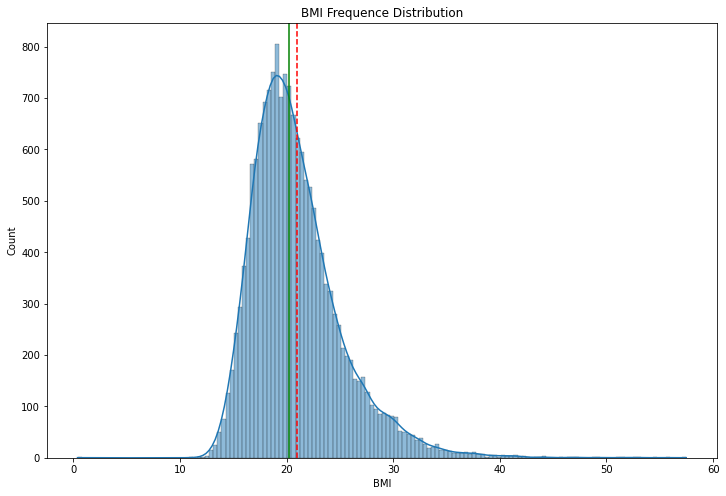

In [29]:
import seaborn as sns
ax = sns.histplot(data = pense, x = 'BMI', kde=True)
ax.figure.set_size_inches(12,8)
ax.axvline(pense.BMI.mean(), color ='red', linestyle= '--' )
ax.axvline(pense.BMI.median(), color ='green', linestyle= '-' )
ax.set_title('BMI Frequence Distribution')
ax.set_xlabel('BMI')
ax;

 ## Visualization of tables

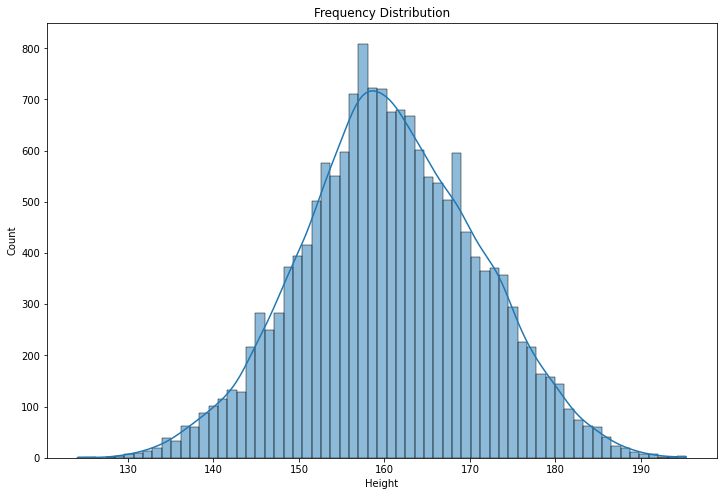

In [30]:
import seaborn as sns
ax = sns.histplot(data = pense, x = 'height', kde=True)
ax.figure.set_size_inches(12,8)
ax.set_title('Frequency Distribution')
ax.set_xlabel('Height')
ax;

### Analyse of Height distribution between genders

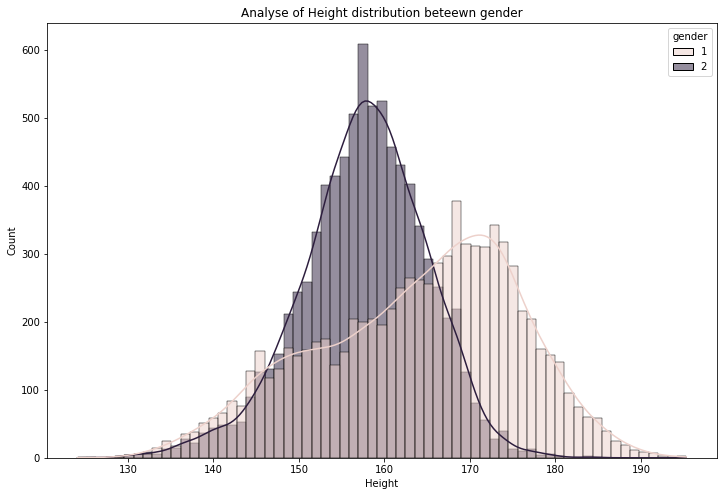

In [31]:
ax = sns.histplot(data = pense, x = 'height', kde=True, hue='gender')
ax.figure.set_size_inches(12,8)
ax.set_title('Analyse of Height distribution beteewn gender')
ax.set_xlabel('Height')
ax;

### Weight  Frequency distribution

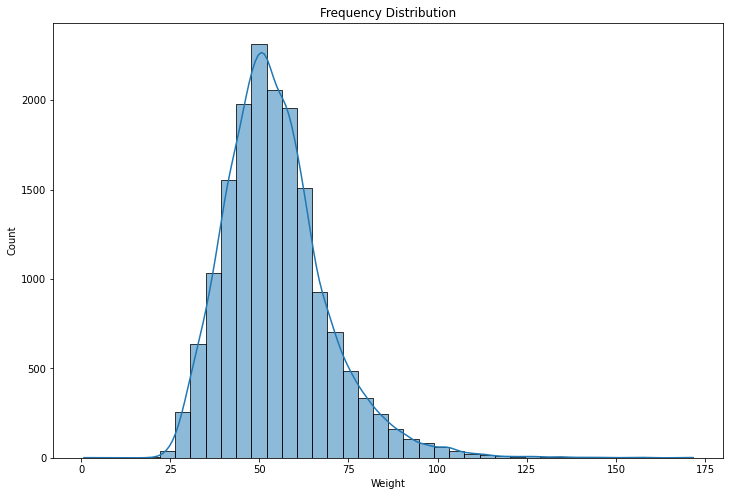

In [32]:
ax = sns.histplot(data = pense, x = 'weight',bins =40, kde=True)
ax.figure.set_size_inches(12,8)
ax.set_title('Frequency Distribution')
ax.set_xlabel('Weight')
ax;

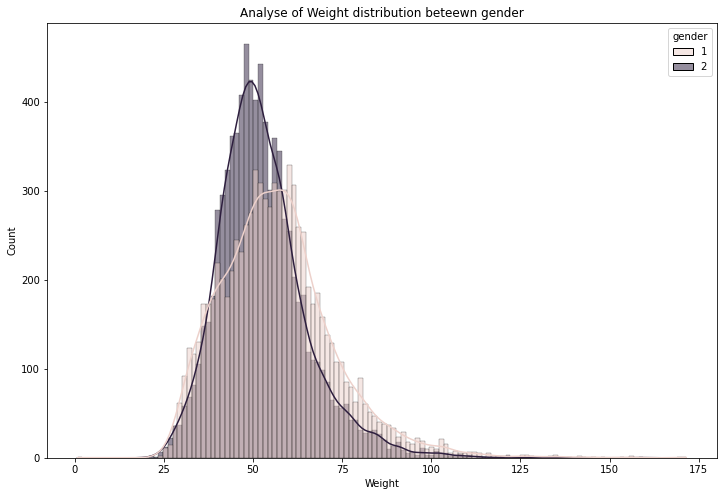

In [33]:
ax = sns.histplot(data = pense, x = 'weight', kde=True, hue='gender')
ax.figure.set_size_inches(12,8)
ax.set_title('Analyse of Weight distribution beteewn gender')
ax.set_xlabel('Weight')
ax;

## Use boxplot to better visualizations of some variables

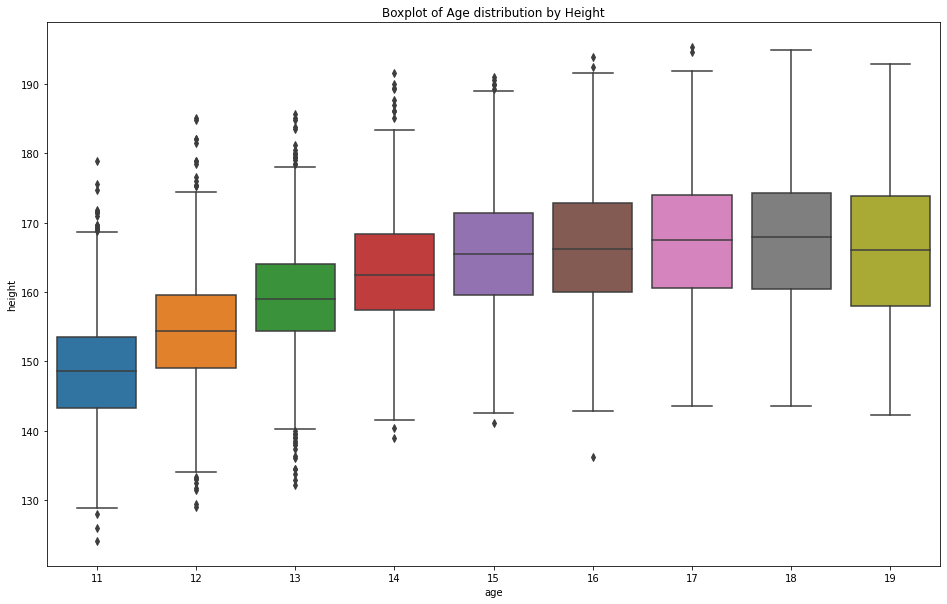

In [34]:
ax = sns.boxplot(x = 'age', y= 'height', data= pense, orient = 'v')
ax.figure.set_size_inches(16,10)
ax.set_title('Boxplot of Age distribution by Height')
ax;

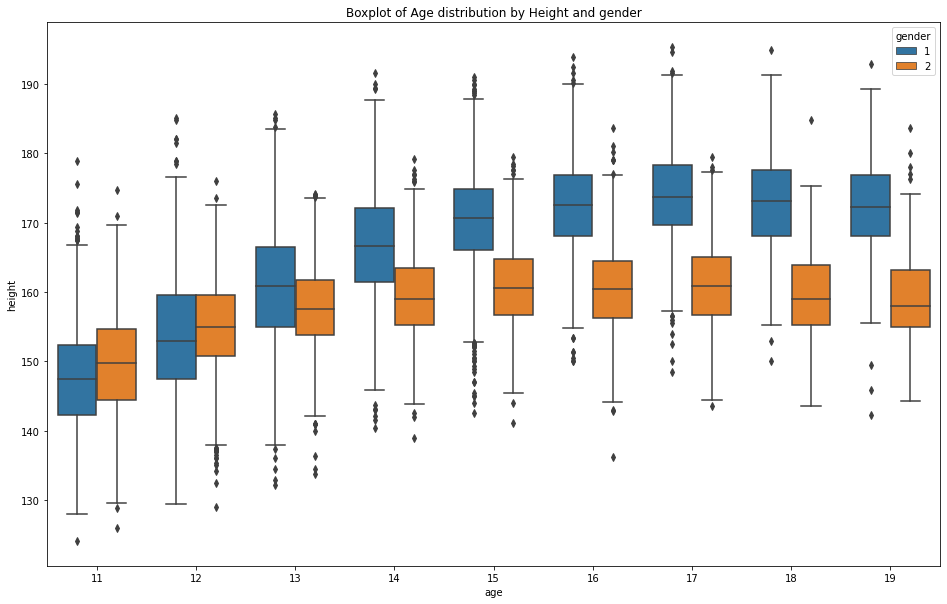

In [35]:
ax = sns.boxplot(x = 'age', y= 'height', data= pense, hue='gender')
ax.figure.set_size_inches(16,10)
ax.set_title('Boxplot of Age distribution by Height and gender')
ax;

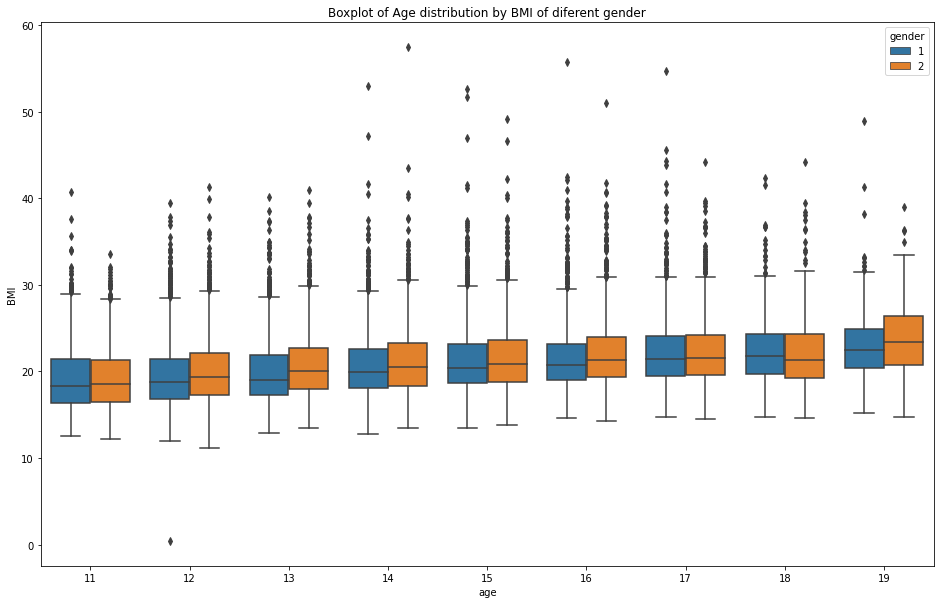

In [36]:
ax = sns.boxplot(x = 'age', y= 'BMI', data= pense, hue='gender' )
ax.figure.set_size_inches(16,10)
ax.set_title('Boxplot of Age distribution by BMI of diferent gender')
ax;

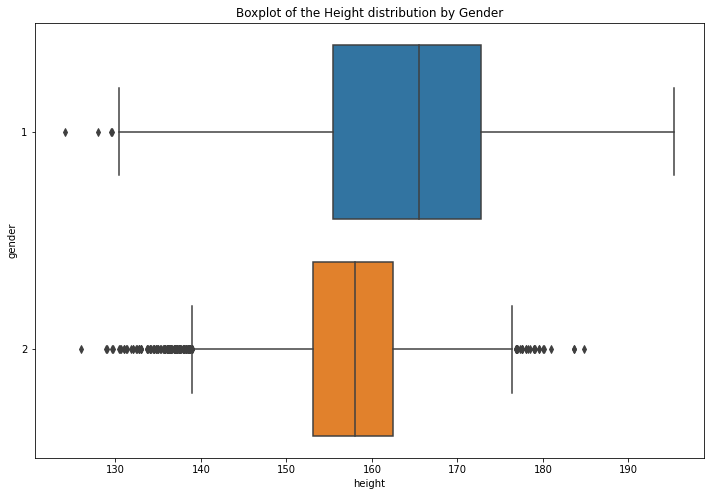

In [37]:
ax = sns.boxplot(x = 'height', y= 'gender', data= pense, orient = 'h')
ax.figure.set_size_inches(12,8)
ax.set_title('Boxplot of the Height distribution by Gender')
ax;

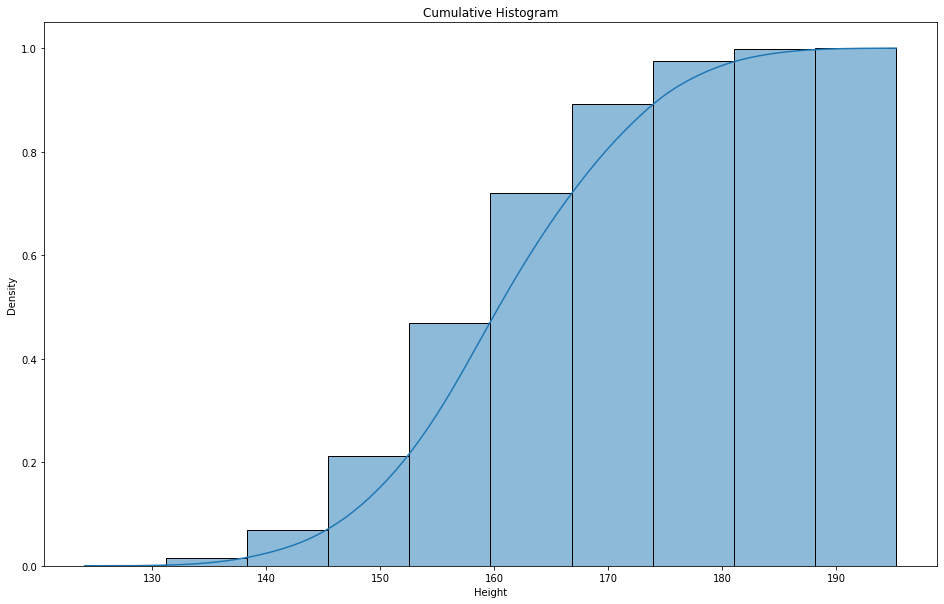

In [38]:
ax = sns.histplot(data = pense, x = 'height', kde=True, cumulative=True, stat = 'density', bins=10)
ax.figure.set_size_inches(16,10)
ax.set_title('Cumulative Histogram')
ax.set_xlabel('Height')
ax;

### Verify the data centralization

In [39]:
pense['height'].mean()

160.71311307079006

In [40]:
pense['height'].mode()

0    160.0
dtype: float64

In [41]:
pense['weight'].mode()

0    50.0
dtype: float64

In [42]:
pense.groupby(['gender', 'age'])['height'].mean()

gender  age
1       11     147.617753
        12     153.696764
        13     160.719801
        14     166.406922
        15     170.336297
        16     172.424933
        17     173.814341
        18     173.024561
        19     172.143158
2       11     149.522512
        12     154.965021
        13     157.673105
        14     159.340320
        15     160.759848
        16     160.386527
        17     160.907937
        18     159.438462
        19     158.977193
Name: height, dtype: float64

### Metrics - Standard Deviation

In [43]:
average_height = pense['height'].mean()
pense['average_height'] = average_height
average_diference = pense['height'] - average_height
pense['average_diference'] = average_diference
pense[['height', 'average_height', 'average_diference']]

,height,average_height,average_diference
0,157.0,160.713113,-3.713113
1,152.0,160.713113,-8.713113
2,161.4,160.713113,0.686887
3,172.5,160.713113,11.786887
4,167.5,160.713113,6.786887
...,...,...,...
16551,167.9,160.713113,7.186887
16552,185.8,160.713113,25.086887
16553,159.4,160.713113,-1.313113
16554,157.8,160.713113,-2.913113


### Find the standard deviation using Pandas

In [44]:
standard_dev = pense["height"].std()
print(standard_dev)

10.340070233827776


In [45]:
standard_dev = pense["weight"].std()
print(standard_dev)

14.547864125282606


In [46]:
standard_dev = pense["age"].std()
print(standard_dev)

2.1279472993822566


In [47]:
standard_dev = pense["BMI"].std()
print(standard_dev)

4.2444414389113305


## Confidence Interval

In [48]:
from statsmodels.stats.weightstats import zconfint

In [49]:
#Calculate z-test
zconfint(pense['height'].to_list())

(160.5556082427712, 160.87061789880892)

In [50]:
from statsmodels.stats.weightstats import DescrStatsW

#Calculate T-Test for height
t_test_height = DescrStatsW(pense['height'])
t_test_height.tconfint_mean()

(160.55559672649298, 160.8706294150872)

## Understanding the distribution diference between genders using boxplot and Z-test

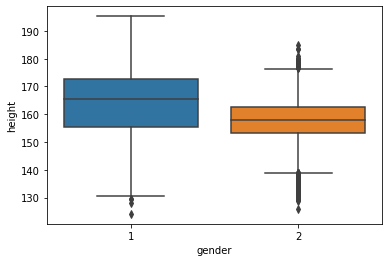

In [51]:
sns.boxplot(x='gender', y='height', data= pense);

Calculate Z test and print the P-value, which is the null hypothesis when become equal to zero, we can reject the null hypothesis in this case.

In [52]:
from statsmodels.stats.weightstats import ztest

height_distribution_m = pense.query('gender ==1')['height']
height_distribution_f = pense.query('gender ==2')['height']

_,  p_value = ztest(height_distribution_m, height_distribution_f)
p_value

0.0

In [53]:
weight_distribution_m = pense.query('gender ==1')['weight']
weight_distribution_f = pense.query('gender ==2')['weight']

_,  p_value = ztest(weight_distribution_m, weight_distribution_f)
p_value

7.903530638224804e-73

### Understant if height is a normal distribution or not

Using Scipy.stats.normaltest, it allow to test if a sample differs from a normal distribution.
Tests the Null hypothesis that a sample comes from a normal distribution, is vased on Pearsons's test that combines skew and kurtosis to produce an omnbus test of normality

In [54]:
from scipy.stats import normaltest
# P_value for Male
_, p_value_nomaltest_m = normaltest(height_distribution_m)
_, p_value_nomaltest_f = normaltest(height_distribution_f)
print(p_value_nomaltest_m)
print(p_value_nomaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [55]:
# P_value for Female
normaltest(height_distribution_f)

NormaltestResult(statistic=212.51572610499005, pvalue=7.125189471020874e-47)

In [56]:
from scipy.stats import ranksums

ranksums(height_distribution_m, height_distribution_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

## Challenge


 Do a description of other variables, do analyse and interpretation of it.

### 1 -  Mode, mean, median

By calculate the mode, mean and median of Height, the results show that Heihgt distribution is simetric

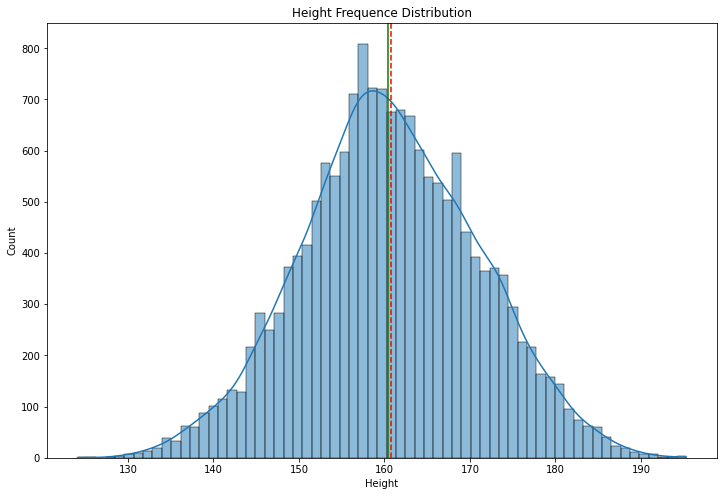

In [57]:
ax = sns.histplot(data = pense, x = 'height', kde=True)
ax.figure.set_size_inches(12,8)
ax.axvline(pense.height.mean(), color ='red', linestyle= '--' )
ax.axvline(pense.height.median(), color ='green', linestyle= '-' )
ax.set_title('Height Frequence Distribution')
ax.set_xlabel('Height')
ax;

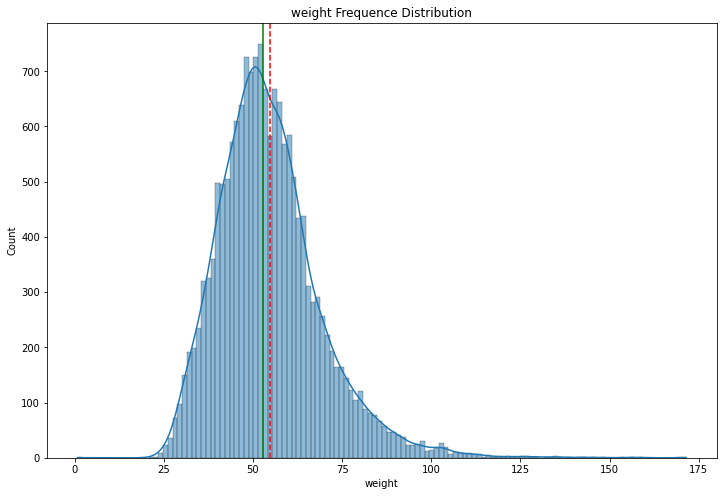

In [58]:
#Weihgt distribution is simetric
ax = sns.histplot(data = pense, x = 'weight', kde=True)
ax.figure.set_size_inches(12,8)
ax.axvline(pense.weight.mean(), color ='red', linestyle= '--' )
ax.axvline(pense.weight.median(), color ='green', linestyle= '-' )
ax.set_title('weight Frequence Distribution')
ax.set_xlabel('weight')
ax;

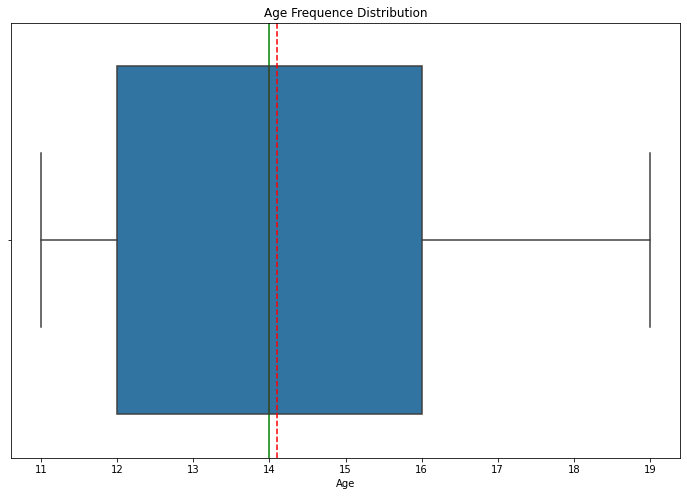

In [59]:
ax = sns.boxplot(data = pense, x = 'age')
ax.figure.set_size_inches(12,8)
ax.axvline(pense.age.mean(), color ='red', linestyle= '--' )
ax.axvline(pense.age.median(), color ='green', linestyle= '-' )
ax.set_title('Age Frequence Distribution')
ax.set_xlabel('Age')
ax;

Find the mean of weight of students by gender and age using crosstab

In [60]:
weight_mean = pd.crosstab(columns= pense['gender'], index=pense['age'], 
            values=pense['weight'], aggfunc='mean')
weight_mean.rename(columns = g, inplace=True)
weight_mean

gender,Male,Female
age,,
11,42.530893,43.310605
12,47.016019,48.472532
13,52.321407,51.624820
14,57.890739,54.237782
15,62.315036,56.203367
16,64.673558,56.952231
17,67.892061,58.133201
18,67.562281,57.694118
19,69.146842,60.507018


### Normal Distribution

 Standard Normal Distribution is a type of probability distribution that is symmetric about the average or the mean, depicting that the data near the average or the mean are occurring more frequently when compared to the data which is far from the average or the mean. A score on the standard normal distribution can be termed as the “Z-score”.
 
 The formula is: Z – Score = ( X – µ ) / σ

The standard normal distribution in order words referred to as the Z-distribution has the following properties:

It has an average or says the mean of zero.
It has a standard deviation, which is equal to 1.
Using the standard normal table, we can find out the areas under the density curve. Z-score is sore on the standard normal distribution and should be interpreted as the number of standard deviations where the data point is below or above the average or the mean.

A negative Z-Score shall indicate a score that is below the mean or the average, while A positive Z-Score shall indicate that the data point is above the mean or the average.
 
 Or we can use the Scipy library, note that The probability density  for a normal distribution can be obtain using this function:
 
 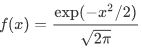
 

In [61]:
from scipy.stats import norm
import numpy as np

standard_table = pd.DataFrame(
    [],
    index= ['{0:0.2f}'.format(i/100) for i in range (0, 400,10)],
    columns= ['{0:0.2f}'.format(i/100) for i in range(0,10)])

for index in standard_table.index:
    for column in standard_table.columns:
        Z = np.round(float(index)+ float(column),2)
        standard_table.loc[index, column] = '{0:0.4f}'.format(norm.cdf(Z))
        
standard_table.rename_axis('Z', axis= 'columns', inplace=True)

standard_table

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


### Find the Standard deviation of the sample

Calculate Central distribution by consider 1500 random samples of 'PENSE'

In [62]:
n =2000
total_sample = 1500
samples = pd.DataFrame()

for i in range(total_sample):
    _= pense.BMI.sample(n)
    _.index = range(0, len(_))
    samples['Sample_'+ str(i)] = _
    
    
samples.head()

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_1490,Sample_1491,Sample_1492,Sample_1493,Sample_1494,Sample_1495,Sample_1496,Sample_1497,Sample_1498,Sample_1499
0,14.996330,21.934620,23.517643,19.397582,21.918053,23.998591,17.615469,14.609282,20.079601,13.602554,...,18.250192,20.089254,29.648743,22.705811,20.894621,18.957696,15.410461,20.387264,15.239198,16.533730
1,22.365474,23.339562,16.467018,15.587327,20.291363,20.601209,17.107769,20.655992,23.384859,25.757090,...,27.136889,17.901197,19.463623,19.066628,18.885645,17.331695,21.204915,19.123255,18.119179,19.294245
2,19.209683,18.105159,22.958717,20.622527,19.078135,18.841231,17.553743,26.857731,24.401417,22.043747,...,20.079428,14.867136,31.588538,30.901920,20.742187,15.161697,26.301037,20.333014,22.497777,29.449811
3,20.016327,17.870540,18.512397,17.280901,20.889858,17.699401,21.664135,17.433005,21.084337,21.848964,...,14.802546,29.041858,20.909698,17.856219,18.279636,22.112689,26.032700,17.717150,18.356738,21.021344
4,16.773955,25.316456,20.904968,20.115194,27.445371,32.704102,21.690008,21.604426,28.589397,24.304618,...,16.619492,17.261326,20.343064,17.214272,18.592223,22.509110,17.080580,19.094494,23.694680,19.765707


In [63]:
import numpy as np
std_sample = pense.BMI.std()/np.sqrt(n)
std_sample

0.09490859583922756

By plot a histogram I could analise if the mean of the samples has a normal distribution curve, and from the shape of the graphic it is possible to confirmed it.

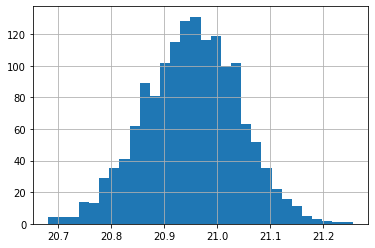

In [96]:
samples.mean().hist(bins=30);

In [65]:
pense.BMI.mean()

20.958252206631837

In [66]:
samples.mean().mean()

20.95198702525556

## Confidence Interval or Degree of Fredom

A confidence interval, in statistics, refers to the probability that a population parameter will fall between a set of values for a certain proportion of times. Confidence intervals measure the degree of uncertainty or certainty in a sampling method. They can take any number of probability limits, with the most common being a 95% or 99% confidence level.


Confidence intervals are conducted using statistical methods, such as a t-test.

In [67]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

https://archive.ics.uci.edu/ml/datasets/Wine

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [68]:
import pandas as pd

In [69]:
wine = pd.read_csv(url, sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


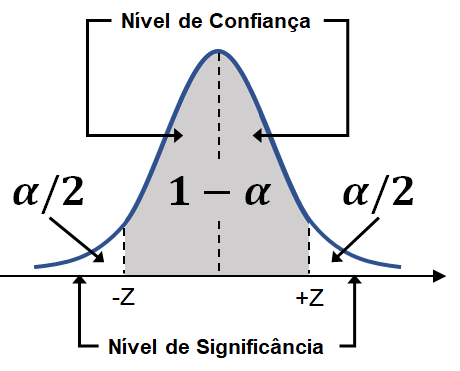

### Problem
Suposse that the density of the sample is normal distributed. Calcualte the standard deviation and mean of a sample of 1000  elements.Build a confidence interval for the average population by assuming the 5% confidence

In [70]:
amostra = wine.sample(n=1000, random_state= 123)

In [71]:
std = amostra['density'].std()

<AxesSubplot:>

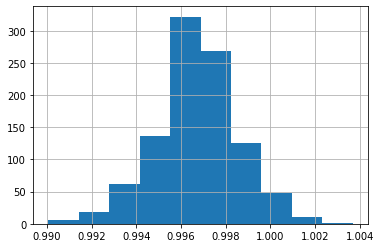

In [72]:
amostra['density'].hist()

In [73]:
n = 1000
significance = 0.05
confidence = 1 - significance

In [74]:
import numpy as np

sigma =  std/np.sqrt(n)
sigma

5.913123380000377e-05

In [75]:
error = Z*sigma
error

0.00023593362286201505

In [76]:
mean_amostra = amostra['density'].mean()

Find the confidence interval calculate manually or in the second step using Scipy library

In [77]:
interval = [mean_amostra - error, mean_amostra + error]
interval

[0.9964831763771379, 0.9969550436228619]

In [78]:
from scipy.stats import norm
norm.interval(alpha=0.95, loc=mean_amostra, scale= sigma)


(0.9966032149113905, 0.9968350050886093)

### Challenges 

Finf the mean of height and weight using aggfunc from pandas

In [79]:
height_mean = round(pd.crosstab(pense['age'], pense['gender'], 
                           values=pense['height'], 
                           aggfunc='mean') / 100, 2)


height_mean.rename(columns=g, inplace=True)
height_mean

gender,Male,Female
age,,
11,1.48,1.50
12,1.54,1.55
13,1.61,1.58
14,1.66,1.59
15,1.70,1.61
16,1.72,1.60
17,1.74,1.61
18,1.73,1.59
19,1.72,1.59


In [80]:
weightt_mean = round(pd.crosstab(pense['age'], pense['gender'], 
                           values=pense['weight'], 
                           aggfunc='mean') / 100, 2)


weightt_mean.rename(columns=g, inplace=True)
weightt_mean

gender,Male,Female
age,,
11,0.43,0.43
12,0.47,0.48
13,0.52,0.52
14,0.58,0.54
15,0.62,0.56
16,0.65,0.57
17,0.68,0.58
18,0.68,0.58
19,0.69,0.61


## Create functions to display Frequence table to better work

In [81]:
def frequence_table(pense: pd.DataFrame, main_title: str, 
                      answers_dict: dict):
  frequence = pense.value_counts()
  proportion = round(pense.value_counts(normalize=True) * 100, 0).astype('int64')
  table = pd.DataFrame({
      'Frequence': frequence,
      'Proportion (%)': proportion
  })
  table.rename_axis(main_title, inplace=True)
  table.rename(index= answers_dict, inplace=True)
  return table

In [82]:
def frequence_table_cont(pense: pd.DataFrame, main_title: str):
  frequence = pense.value_counts()
  proportion = round(pense.value_counts(normalize=True) * 100, 0).astype('int64')
  table = pd.DataFrame({
      'Frequence': frequence,
      'Proportion (%)': proportion
  })
  table.rename_axis(main_title, inplace=True)
  return table

**Got hungry**

In [83]:
got_hungry ={
    1: 'Nunca',
    2: 'Raramente',
    3: 'Às vezes',
    4: 'Na maior parte das vezes',
    5: 'Sempre',
    99: 'Não informado'
}

In [84]:
got_hungry_freq = frequence_table(pense['VB02024'], 
                                          'Got  hungry beacuse does not have enough food at home',
                                          got_hungry)
got_hungry_freq

,Frequence,Proportion (%)
Got hungry beacuse does not have enough food at home,,
Nunca,12825,77
Raramente,1786,11
Às vezes,1443,9
Na maior parte das vezes,253,2
Sempre,219,1
Não informado,30,0


**Fresh Fruits/Saladas**

In [85]:
eat_fresh = {
    1: 'Não comi frutas frescas ou salada de frutas nos últimos 7 dias (0 dia)',
    2: '1 dia nos últimos 7 dias',
    3: '2 dias nos últimos 7 dias',
    4: '3 dias nos últimos 7 dias',
    5: '4 dias nos últimos 7 dias',
    6: '5 dias nos últimos 7 dias',
    7: '6 dias nos últimos 7 dias',
    8: 'Todos os dias nos últimos 7 dias',
    99: 'Não informado'}

In [86]:
eat_fresh_freq = frequence_table(pense['VB02011'], 
                                          'Eat fresh Fruit and Salada',
                                          eat_fresh)
eat_fresh_freq

,Frequence,Proportion (%)
Eat fresh Fruit and Salada,,
Todos os dias nos últimos 7 dias,3383,20
Não comi frutas frescas ou salada de frutas nos últimos 7 dias (0 dia),3214,19
2 dias nos últimos 7 dias,2122,13
1 dia nos últimos 7 dias,2115,13
3 dias nos últimos 7 dias,1980,12
4 dias nos últimos 7 dias,1491,9
5 dias nos últimos 7 dias,1281,8
6 dias nos últimos 7 dias,933,6
Não informado,37,0


# Super challenge

Create a dictionary to facilitate the search of the questions.



In [87]:
df_dict = pd.read_excel('Dicionario_PENSE_Microdados_AMOSTRA2.xls')

In [88]:
df_dict

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte
...,...,...
1213,3,Confessional
1214,4,Filantrópica
1215,aluno,contador de aluno
1216,escola,UPA (unidade primária de amostragem)


In [89]:
answers = {}
dictionary_id = {}

In [90]:
def generate_dictionary_id():
  #Start the dictionary
  answers = {}

  
  for ind in df_dict.index:
      # Check if is a question by analyse if is a string
      if (not str(df_dict.loc[ind]['VARIÁVEL']).isnumeric() and
          not str(df_dict.loc[ind]['VARIÁVEL']) == '-1'):
       
        if ind > 0:
          dictionary_id[key]['Answers'] = answers
          answers = {} 

        
        key = df_dict.loc[df_dict.index[ind]]['VARIÁVEL']
        
        # Adding Dictionary structure
        dictionary_id[key] = {
        'Question- code': df_dict.loc[df_dict.index[ind]]['VARIÁVEL'],
        'Question': df_dict.loc[df_dict.index[ind]]['QUESTIONÁRIO DO ALUNO'],
        'Answers': answers}
      
      else:
        # Adding the answers
        if str(df_dict.loc[ind]['VARIÁVEL']).isnumeric():
          answers[int(df_dict.loc[ind]['VARIÁVEL'])] = df_dict.loc[ind]['QUESTIONÁRIO DO ALUNO']
        else:
          answers[df_dict.loc[ind]['VARIÁVEL']] = df_dict.loc[ind]['QUESTIONÁRIO DO ALUNO']
  return print('Dictionary generated successfully')


generate_dictionary_id()

Dictionary generated successfully


Call for the key argument

In [91]:
dictionary_id['VB0901706']

{'Question- code': 'VB0901706',
 'Question': 'Outras pessoas forçaram você a ter relação sexual?',
 'Answers': {-1: 'Pulo no questionário',
  1: 'Sim',
  2: 'Não',
  99: 'Não informado'}}

Call using Key argument to get the Question from the DataFrame

In [92]:
dictionary_id['VB02011']['Question']

'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu frutas frescas ou salada de frutas? '

Call using Key argument to get the Answer from the DataFrame

In [93]:
dictionary_id['VB02011']['Answers']

{1: 'Não comi frutas frescas ou salada de frutas nos últimos 7 dias (0 dia)',
 2: '1 dia nos últimos 7 dias',
 3: '2 dias nos últimos 7 dias',
 4: '3 dias nos últimos 7 dias',
 5: '4 dias nos últimos 7 dias',
 6: '5 dias nos últimos 7 dias',
 7: '6 dias nos últimos 7 dias',
 8: 'Todos os dias nos últimos 7 dias',
 99: 'Não informado'}

In [94]:
dictionary_id['VB02013']['Question']

'NOS ÚLTIMOS 7 DIAS, em quantos dias você tomou refrigerante?'

In [95]:
dictionary_id['VB02013']['Answers']

{1: 'Não tomei refrigerante nos últimos 7 dias (0 dia)',
 2: '1 dia nos últimos 7 dias',
 3: '2 dias nos últimos 7 dias',
 4: '3 dias nos últimos 7 dias',
 5: '4 dias nos últimos 7 dias',
 6: '5 dias nos últimos 7 dias',
 7: '6 dias nos últimos 7 dias',
 8: 'Todos os dias nos últimos 7 dias',
 99: 'Não informado'}